In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

#Cargamos data set2
url= 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo.csv'
df = pd.read_csv(url)
df.head()

,Region,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,...,2023-06-13,2023-06-14,2023-06-15,2023-06-16,2023-06-17,2023-06-18,2023-06-19,2023-06-20,2023-06-21,2023-06-22
0,Arica y Parinacota,0,0,0,0,0,0,0,0,0,...,849,849,849,849,849,849,849,849,849,849
1,Tarapacá,0,0,0,0,0,0,0,0,0,...,1140,1140,1140,1140,1140,1140,1140,1140,1140,1140
2,Antofagasta,0,0,0,0,0,0,0,0,0,...,1841,1841,1841,1841,1841,1841,1841,1841,1841,1841
3,Atacama,0,0,0,0,0,0,0,0,0,...,698,698,698,698,698,698,698,698,698,698
4,Coquimbo,0,0,0,0,0,0,0,0,0,...,1885,1885,1885,1885,1885,1885,1885,1885,1885,1886


In [4]:
#Se seleccionan las columnas que tienen fechas
vals= list(df.columns)[1:-1]
#Se seleccionan el resto de las columnas
ids= list(df.columns)[:1]

In [5]:

df_tidy= pd.melt(df, value_vars=vals, id_vars=ids)
df_tidy= df_tidy.rename(columns={'variable':'Fechas'})
df_tidy= df_tidy.rename(columns={'value':'Fallecidos'})
df_tidy['Fechas']=pd.to_datetime(df_tidy['Fechas'], format='%Y-%m-%d')

In [6]:
df_tidy

,Region,Fechas,Fallecidos
0,Arica y Parinacota,2020-03-22,0
1,Tarapacá,2020-03-22,0
2,Antofagasta,2020-03-22,0
3,Atacama,2020-03-22,0
4,Coquimbo,2020-03-22,0
...,...,...,...
20174,Los Ríos,2023-06-21,1400
20175,Los Lagos,2023-06-21,2478
20176,Aysén,2023-06-21,219
20177,Magallanes,2023-06-21,706


In [7]:
#Usamos los fallecidos totales en Chile por fecha

df = df_tidy.groupby('Fechas')['Fallecidos'].sum().reset_index()

df

,Fechas,Fallecidos
0,2020-03-22,2
1,2020-03-23,2
2,2020-03-24,4
3,2020-03-25,6
4,2020-03-26,8
...,...,...
1182,2023-06-17,123131
1183,2023-06-18,123133
1184,2023-06-19,123135
1185,2023-06-20,123137


In [8]:

df['Fallecidos_Nuevos'] = df['Fallecidos'].diff()

# Rellenar los valores NaN con 0
df['Fallecidos_Nuevos'] = df['Fallecidos_Nuevos'].fillna(0)
# Obtener el número de fallecidos nuevos en la primera fecha
df.loc[0, 'Fallecidos_Nuevos'] = df.loc[0, 'Fallecidos']



In [9]:
# 1) Inspeccionar los datos
df.head()


,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0


In [10]:
# Establecer opciones de formato para mostrar el DataFrame completo
pd.set_option('display.max_columns', 10)  # Mostrar todas las columnas
pd.set_option('display.max_rows', 10)  # Mostrar todas las filas
df

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0
...,...,...,...
1182,2023-06-17,123131,12.0
1183,2023-06-18,123133,2.0
1184,2023-06-19,123135,2.0
1185,2023-06-20,123137,2.0


In [11]:
negativos= df.loc[df["Fallecidos_Nuevos"]<0]
negativos
#Tenemos un dato mal sumado

,Fechas,Fallecidos,Fallecidos_Nuevos
1100,2023-03-27,121953,-7039.0


In [12]:
df.loc[1100:, 'Fallecidos'] += 7039
df

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0
...,...,...,...
1182,2023-06-17,130170,12.0
1183,2023-06-18,130172,2.0
1184,2023-06-19,130174,2.0
1185,2023-06-20,130176,2.0


In [14]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
df

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0
5,2020-03-27,10,2.0
6,2020-03-28,12,2.0
7,2020-03-29,14,2.0
8,2020-03-30,16,2.0
9,2020-03-31,24,8.0


In [15]:
df['Fallecidos_Nuevos'] = df['Fallecidos'].diff()

# Rellenar los valores NaN con 0
df['Fallecidos_Nuevos'] = df['Fallecidos_Nuevos'].fillna(0)
# Obtener el número de fallecidos nuevos en la primera fecha
df.loc[0, 'Fallecidos_Nuevos'] = df.loc[0, 'Fallecidos']
df

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0
5,2020-03-27,10,2.0
6,2020-03-28,12,2.0
7,2020-03-29,14,2.0
8,2020-03-30,16,2.0
9,2020-03-31,24,8.0


In [16]:
# 2) Manejar datos faltantes
#Inspeccionamos datos faltantes nuevamente
datos_faltantes = df.isna().sum()
print(datos_faltantes)
#Ya no hay datos faltantes

Fechas               0
Fallecidos           0
Fallecidos_Nuevos    0
dtype: int64


In [17]:
# 3) Convertir tipos de datos

df['Fechas']=pd.to_datetime(df['Fechas'], format='%Y-%m-%d')

In [18]:
# 4)Calcular estadisticas basicas

media_fallecidos = df['Fallecidos_Nuevos'].mean()
media_fallecidos

109.66807076663858

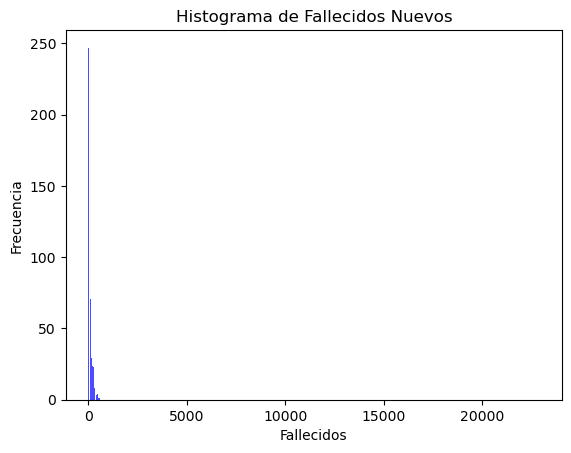

In [23]:
#5) Crear Histograma
plt.hist(df['Fallecidos_Nuevos'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Fallecidos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fallecidos Nuevos')
plt.xlim=(0,200)
plt.show()

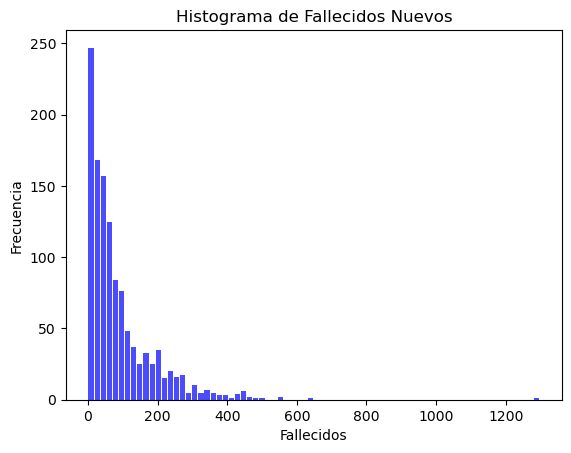

In [24]:
#5) Crear Histograma: Enfatizamos donde se concentra la mayor distribucion de valores.(Evitar Outliers)
df_filtrado = df[df['Fallecidos_Nuevos'] <= 2000]
plt.hist(df_filtrado['Fallecidos_Nuevos'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('Fallecidos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Fallecidos Nuevos')
plt.xlim=(0,200)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

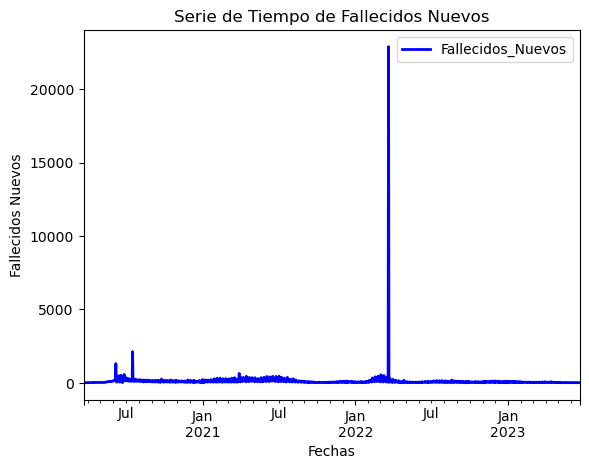

In [33]:
#Series de tiempo

plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
df.plot(x='Fechas', y='Fallecidos_Nuevos', color='blue', linewidth=2)


plt.xlabel('Fechas')
plt.ylabel('Fallecidos Nuevos')
plt.title('Serie de Tiempo de Fallecidos Nuevos')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

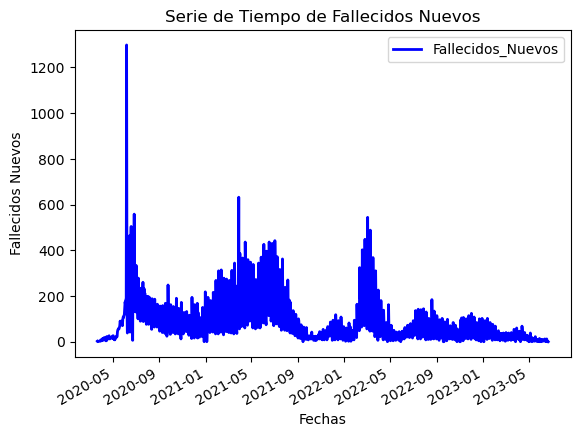

In [34]:
#Serie de tiempo:  Enfatizamos donde se concentra la mayor distribucion de valores.(Evitar Outliers)

plt.figure(figsize=(10, 6))  # Establecer el tamaño de la figura
df_filtrado.plot(x='Fechas', y='Fallecidos_Nuevos', color='blue', linewidth=2)

# Agregar etiquetas y título
plt.xlabel('Fechas')
plt.ylabel('Fallecidos Nuevos')
plt.title('Serie de Tiempo de Fallecidos Nuevos')
plt.legend()
plt.show

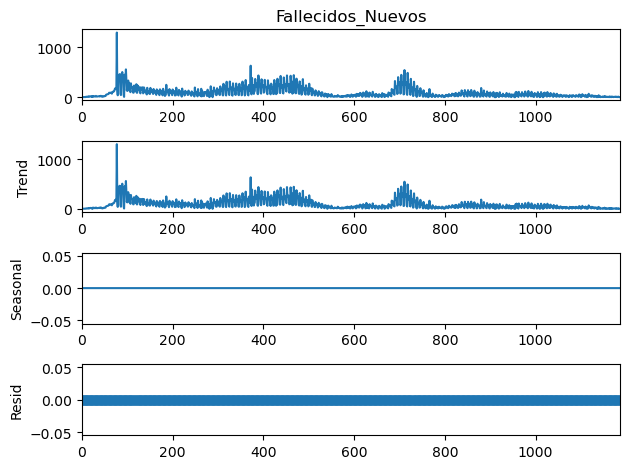

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descompone una columna de series temporales
descomposicion = seasonal_decompose(df_filtrado['Fallecidos_Nuevos'],
                                    model='additive', period=1)
descomposicion.plot()
plt.show()

In [38]:
df_filtrado

,Fechas,Fallecidos,Fallecidos_Nuevos
0,2020-03-22,2,2.0
1,2020-03-23,2,0.0
2,2020-03-24,4,2.0
3,2020-03-25,6,2.0
4,2020-03-26,8,2.0
5,2020-03-27,10,2.0
6,2020-03-28,12,2.0
7,2020-03-29,14,2.0
8,2020-03-30,16,2.0
9,2020-03-31,24,8.0


In [42]:
from statsmodels.tsa.arima.model import ARIMA

# Crear y ajustar un modelo ARIMA
modelo = ARIMA(df['Fallecidos_Nuevos'], order=(5, 1, 0))
modelo_ajustado = modelo.fit()
print(modelo_ajustado.summary())

                               SARIMAX Results                                
Dep. Variable:      Fallecidos_Nuevos   No. Observations:                 1187
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9485.669
Date:                Sun, 02 Jul 2023   AIC                          18983.337
Time:                        16:58:21   BIC                          19013.807
Sample:                             0   HQIC                         18994.822
                               - 1187                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8378      0.005   -153.934      0.000      -0.848      -0.827
ar.L2         -0.6763      0.007    -97.126      0.000      -0.690      -0.663
ar.L3         -0.4998      0.007    -67.125      0.0